## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import os

# Study data files
mouse_metadata_path = os.path.join("Data","Mouse_metadata.csv")
study_results_path = os.path.join("Data","Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_results = study_results.merge(mouse_metadata,  left_on='Mouse ID', right_on='Mouse ID' )

# Display the data table for preview
total_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
total_results["Mouse ID"].describe()

count     1893
unique     249
top       g989
freq        13
Name: Mouse ID, dtype: object

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = total_results.duplicated(subset=['Mouse ID','Timepoint'])
total_results["Duplicates"] = duplicated
total_results["Duplicates"].value_counts()

False    1888
True        5
Name: Duplicates, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_info = total_results[total_results['Duplicates'] == True] 
total_results.drop(columns="Duplicates", inplace = True)
duplicated_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicates
861,g989,0,45.000000,0,Propriva,Female,21,26,True
863,g989,5,47.570392,0,Propriva,Female,21,26,True
865,g989,10,49.880528,0,Propriva,Female,21,26,True
867,g989,15,53.442020,0,Propriva,Female,21,26,True
869,g989,20,54.657650,1,Propriva,Female,21,26,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
total_results.drop_duplicates(["Mouse ID","Timepoint"], inplace = True)
total_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
len(total_results["Mouse ID"].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_regimen = total_results.groupby(["Drug Regimen"])
regime_mean = pd.DataFrame(grouped_regimen["Tumor Volume (mm3)"].mean())
regime_median = pd.DataFrame(grouped_regimen["Tumor Volume (mm3)"].median())
regime_variance = pd.DataFrame(grouped_regimen["Tumor Volume (mm3)"].var())
regime_std_dev = pd.DataFrame(grouped_regimen["Tumor Volume (mm3)"].std())
regime_sem = pd.DataFrame(grouped_regimen["Tumor Volume (mm3)"].sem())

summary_statistics = regime_mean
summary_statistics.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume Mean"}, inplace = True) 
summary_statistics["Tumor Volume Median"] = regime_median
summary_statistics["Tumor Volume Variance"] = regime_variance
summary_statistics["Tumor Volume StdDev"] = regime_std_dev
summary_statistics["Tumor Volume SEM"] = regime_sem

summary_statistics


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume StdDev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
grouped_regimen["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

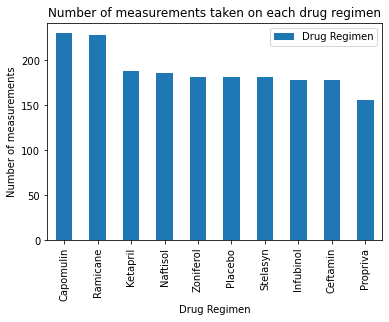

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugs= pd.DataFrame(total_results["Drug Regimen"].value_counts())
drugs.plot(kind = 'bar')

plt.title("Number of measurements taken on each drug regimen")
plt.xlabel ("Drug Regimen")
plt.ylabel ("Number of measurements")
plt.show()


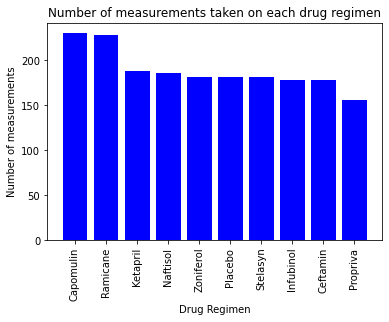

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.xticks(rotation=90)
plt.bar(drugs.index, drugs["Drug Regimen"], align ="center", color = "b")
plt.title("Number of measurements taken on each drug regimen")
plt.xlabel ("Drug Regimen")
plt.ylabel ("Number of measurements")

plt.show()

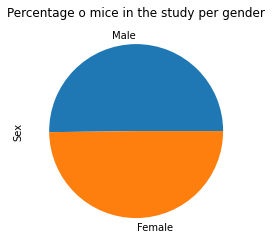

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = pd.DataFrame(total_results.drop_duplicates(["Mouse ID","Sex"])["Sex"].value_counts())

gender_count.plot.pie(y="Sex", legend=None)

plt.title("Percentage o mice in the study per gender")

plt.show()

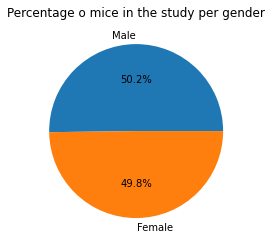

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie (gender_count["Sex"],labels = gender_count.index, autopct="%1.1f%%")
plt.title("Percentage o mice in the study per gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#regime_analysis = total_results.where(total_results["Drug Regimen"] == ["Capomulin","Ramicane","Infubinol","Ceftamin"])
regimen_analysis = total_results[total_results['Drug Regimen'].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"]) ]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(regimen_analysis.groupby(['Mouse ID'])['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_volume_analysis = max_timepoint.merge(regimen_analysis,  left_on=['Mouse ID','Timepoint'], right_on=['Mouse ID','Timepoint'])
final_volume_analysis[["Mouse ID","Timepoint","Tumor Volume (mm3)"]].head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3)
0,a203,45,67.973419
1,a251,45,65.525743
2,a275,45,62.999356
3,a411,45,38.407618
4,a444,45,43.047543
5,a520,45,38.810366
6,a577,30,57.031862
7,a644,45,32.978522
8,a685,45,66.083066
9,b128,45,38.982878


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = final_volume_analysis["Drug Regimen"].tolist()
    
# Create empty list to fill with tumor vol data (for plotting)
vol_data = []
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_capomulin = final_volume_analysis["Tumor Volume (mm3)"].where(final_volume_analysis["Drug Regimen"] == "Capomulin").quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin - lowerq_capomulin
lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)

print(f"The lower quartile of Tumor Volume for Capomulin is: {lowerq_capomulin}")
print(f"The upper quartile of Tumor Volume for Capomulin is: {upperq_capomulin}")
print(f"The interquartile range of Tumor Volume for Capomulin is: {iqr_capomulin}")
print(f"The the median of Tumor Volume for Capomulin is: {quartiles_capomulin[0.5]} ")
print(f"Values below {lower_bound_capomulin} could be outliers.")
print(f"Values above {upper_bound_capomulin} could be outliers.")

print(f"-"*15)


quartiles_ramicane = final_volume_analysis["Tumor Volume (mm3)"].where(final_volume_analysis["Drug Regimen"] == "Ramicane").quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane - lowerq_ramicane
lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)

print(f"The lower quartile of Tumor Volume for ramicane is: {lowerq_ramicane}")
print(f"The upper quartile of Tumor Volume for ramicane is: {upperq_ramicane}")
print(f"The interquartile range of Tumor Volume for ramicane is: {iqr_ramicane}")
print(f"The the median of Tumor Volume for ramicane is: {quartiles_ramicane[0.5]} ")
print(f"Values below {lower_bound_ramicane} could be outliers.")
print(f"Values above {upper_bound_ramicane} could be outliers.")
print(f"-"*15)

quartiles_infubinol = final_volume_analysis["Tumor Volume (mm3)"].where(final_volume_analysis["Drug Regimen"] == "Infubinol").quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol - lowerq_infubinol
lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)

print(f"The lower quartile of Tumor Volume for infubinol is: {lowerq_infubinol}")
print(f"The upper quartile of Tumor Volume for infubinol is: {upperq_infubinol}")
print(f"The interquartile range of Tumor Volume for infubinol is: {iqr_infubinol}")
print(f"The the median of Tumor Volume for infubinol is: {quartiles_infubinol[0.5]} ")
print(f"Values below {lower_bound_infubinol} could be outliers.")
print(f"Values above {upper_bound_infubinol} could be outliers.")
print(f"-"*15)


quartiles_ceftamin = final_volume_analysis["Tumor Volume (mm3)"].where(final_volume_analysis["Drug Regimen"] == "Ceftamin").quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin - lowerq_ceftamin
lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)

print(f"The lower quartile of Tumor Volume for ceftamin is: {lowerq_ceftamin}")
print(f"The upper quartile of Tumor Volume for ceftamin is: {upperq_ceftamin}")
print(f"The interquartile range of Tumor Volume for ceftamin is: {iqr_ceftamin}")
print(f"The the median of Tumor Volume for ceftamin is: {quartiles_ceftamin[0.5]} ")
print(f"Values below {lower_bound_ceftamin} could be outliers.")
print(f"Values above {upper_bound_ceftamin} could be outliers.")
print(f"-"*15)


    # Locate the rows which contain mice on each drug and get the tumor volumes
       
    # add subset 
capomulin_analysis = regimen_analysis.loc[regimen_analysis["Drug Regimen"] == "Capomulin", ["Tumor Volume (mm3)","Mouse ID","Timepoint","Weight (g)"]]
ramicane_analysis = regimen_analysis.loc[regimen_analysis["Drug Regimen"] == "Ramicane",["Tumor Volume (mm3)","Mouse ID","Timepoint","Weight (g)"]]
infubinol_analysis = regimen_analysis.loc[regimen_analysis["Drug Regimen"] == "Infubinol", ["Tumor Volume (mm3)","Mouse ID","Timepoint","Weight (g)"]]
ceftamin_analysis = regimen_analysis.loc[regimen_analysis["Drug Regimen"] == "Ceftamin", ["Tumor Volume (mm3)","Mouse ID","Timepoint","Weight (g)"]]


The lower quartile of Tumor Volume for Capomulin is: 32.37735684
The upper quartile of Tumor Volume for Capomulin is: 40.1592203
The interquartile range of Tumor Volume for Capomulin is: 7.781863460000004
The the median of Tumor Volume for Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
---------------
The lower quartile of Tumor Volume for ramicane is: 31.56046955
The upper quartile of Tumor Volume for ramicane is: 40.65900627
The interquartile range of Tumor Volume for ramicane is: 9.098536719999998
The the median of Tumor Volume for ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
---------------
The lower quartile of Tumor Volume for infubinol is: 54.04860769
The upper quartile of Tumor Volume for infubinol is: 65.52574285
The interquartile range of Tumor Volume for infubinol is: 11.477135160000003
The the median of Tumor Volume for

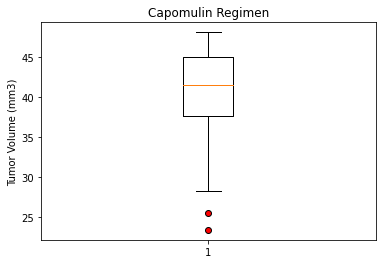

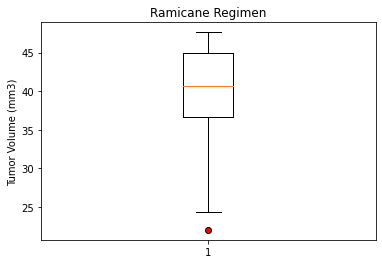

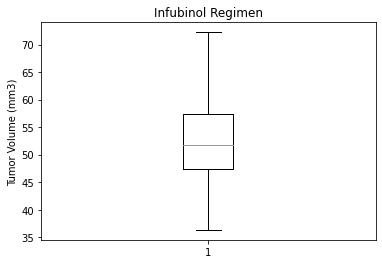

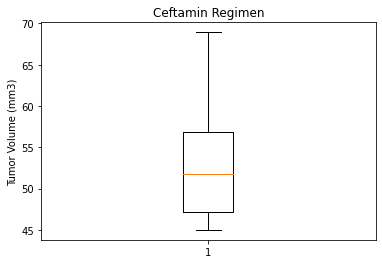

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='r', marker='o')

fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capomulin_analysis['Tumor Volume (mm3)'], flierprops=green_diamond)
plt.show()


fig2, ax2 = plt.subplots()
ax2.set_title('Ramicane Regimen')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(ramicane_analysis['Tumor Volume (mm3)'], flierprops=green_diamond)
plt.show()

fig3, ax3 = plt.subplots()
ax3.set_title('Infubinol Regimen')
ax3.set_ylabel('Tumor Volume (mm3)')
ax3.boxplot(infubinol_analysis['Tumor Volume (mm3)'], flierprops=green_diamond)
plt.show()

fig4, ax4 = plt.subplots()
ax4.set_title('Ceftamin Regimen')
ax4.set_ylabel('Tumor Volume (mm3)')
ax4.boxplot(ceftamin_analysis['Tumor Volume (mm3)'], flierprops=green_diamond)
plt.show()



## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

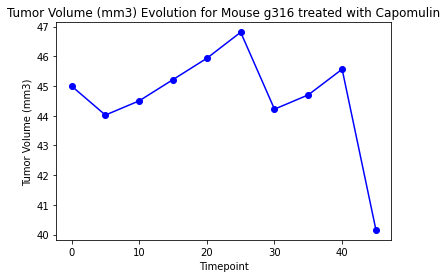

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Mouse ID g316
mouse_analysis = capomulin_analysis.loc[capomulin_analysis["Mouse ID"] == "g316", ["Tumor Volume (mm3)","Timepoint"]]

plt.plot(mouse_analysis["Timepoint"], mouse_analysis["Tumor Volume (mm3)"], marker ='o', color='blue')
plt.title("Tumor Volume (mm3) Evolution for Mouse g316 treated with Capomulin")
plt.xlabel ("Timepoint")
plt.ylabel ("Tumor Volume (mm3)")
plt.show
                                                     



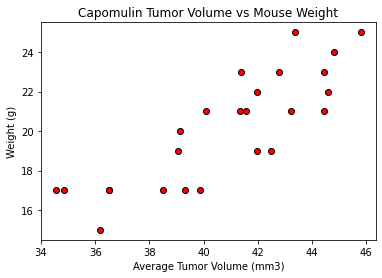

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
grouped_capomulin = capomulin_analysis.groupby(["Mouse ID"])
avg_tumor_volume = pd.DataFrame(grouped_capomulin["Tumor Volume (mm3)"].mean())
mouse_weight = pd.DataFrame(grouped_capomulin["Weight (g)"].mean())

plt.scatter(avg_tumor_volume, mouse_weight, marker="o", facecolors="red", edgecolors="black")
plt.title("Capomulin Tumor Volume vs Mouse Weight")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()




## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr( mouse_weight["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"])
print(f"The correlation coefficient between Tumor Volume (mm3) and mouse weight (g) is {round(correlation[0],2)}")

The correlation coefficient between Tumor Volume (mm3) and mouse weight (g) is 0.84


In [19]:
y_values = avg_tumor_volume["Tumor Volume (mm3)"]
x_values = mouse_weight["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print (f"The line regression values for Average Tumor Volume and Weight for the Capumulin Regimen is {line_eq}, being the Average Tumor Volume the dependant variable") 

The line regression values for Average Tumor Volume and Weight for the Capumulin Regimen is y = 0.95x + 21.55, being the Average Tumor Volume the dependant variable
